In [1]:
# Importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.mode.chained_assignment = None

In [3]:
pwd

'C:\\Users\\Ushus'

In [4]:
#Read the dataset from csv file using pandas
appl=pd.read_csv("application_data.csv")
prev= pd.read_csv("previous_application.csv")

In [5]:
# Determining the shape of the datset
appl.shape

(307511, 122)

In [6]:
# Print the full summary 
appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
#apply the describe() funvtiom on data frame to view some basic statistical details like percentile, mean, std etc. 
appl.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY   EXT_SOURCE_1  EXT_SOURCE_2   EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG   LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05  3.075110e+05  307499.000000     3.072330e+05               307511.000000  307511.000000  307511.000000      307511.000000    307511.000000  104582.000000  307511.000000   307511.000000    307511.000000     307511.000000  307511.000000  307511.000000    307509.000000         307511.000000                307511.000000            307511.000000               307511.000000               307511.000000                307511.000000           307511.000000           307511.000000            307511.000000  134133.000000  3.068510e+05  246546.000000    151450.00000     127568.000000                157504.000000    103023.000000    92646.000000  143620.000000  152683.000000  154491.000000   98869.000000  124921.000000          97312.000000   153161.000000             93997.000000      137829.000000    151450.000000      127568.000000                 157504.000000     103023.000000     92646.000000   143620.000000   
mean   278180.518577       0.080729       0.417052      1.687979e+05  5.990260e+05   27108.573909     5.383962e+05                    0.020868  -16036.995067   63815.045904       -4986.120328     -2994.202373      12.061091       0.999997        0.819889         0.199368          0.998133       0.281066       0.056720         2.152665              2.052463                     2.031521                12.063419                    0.015144                    0.050769                     0.040659                0.078173                0.230454                 0.179555       0.502130  5.143927e-01       0.510853         0.11744          0.088442                     0.977735         0.752471        0.044621       0.078942       0.149725       0.226282       0.231894       0.066333              0.100775        0.107399                 0.008809           0.028358         0.114231           0.087543                      0.977065          0.759637         0.042553        0.074490   
std    102790.175348       0.272419       0.722121      2.371231e+05  4.024908e+05   14493.737315     3.694465e+05                    0.013831    4363.988632  141275.766519        3522.886321      1509.450419      11.944812       0.001803        0.384280         0.399526          0.043164       0.449521       0.231307         0.910682              0.509034                     0.502737                 3.265832                    0.122126                    0.219526                     0.197499                0.268444                0.421124                 0.383817       0.211062  1.910602e-01       0.194844         0.10824          0.082438                     0.059223         0.113280        0.076036       0.134576       0.100049       0.144641       0.161380       0.081184              0.092576        0.110565                 0.047732           0.069523         0.107936           0.084307                      0.064575          0.110111         0.074445        0.132256   
min    100002.000000       0.000000       0.000000      2.

In [8]:
#checking nulls
#checking how many column are having nulls greater than 13%, 20% and 30%
null_col_15=appl.loc[:, appl.isnull().mean() >= .13]
null_col_20=appl.loc[:, appl.isnull().mean() >= .20]
null_col_30=appl.loc[:, appl.isnull().mean() >= .30]
print(null_col_15.shape)
print(null_col_20.shape)
print(null_col_30.shape)

(307511, 57)
(307511, 50)
(307511, 50)


Insight:
There are many columns in applicationDF dataframe where missing value is more than 13%. 

In [9]:
#Hence it is enough if we consider those column that are having lesser than 13% mean in nulls.
app= appl.loc[:, appl.isnull().mean() <= .13]
app.shape

(307511, 65)

In [10]:
# Checking the columns and their null percentage to fill with medium
(100*app.isnull().sum()/len(app)).round(2)

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
FLAG_MOBIL                     0.00
FLAG_EMP_PHONE                 0.00
FLAG_WORK_PHONE                0.00
FLAG_CONT_MOBILE               0.00
FLAG_PHONE                     0.00
FLAG_EMAIL                     0.00
CNT_FAM_MEMBERS             

In [11]:
#Count data types in pandas dataframe
app.dtypes.value_counts()

int64      41
float64    13
object     11
dtype: int64

In [12]:
# select numeric,float and object columns from app dataframe

numerics = ['int16', 'int32', 'int64']
floats = ['float16', 'float32', 'float64']
objects = ['object']
num_app = app.select_dtypes(include=numerics)
float_app = app.select_dtypes(include=floats) 
obj_app = app.select_dtypes(include=objects)  
print((num_app.isnull().mean()*100).round(3))
print((float_app.isnull().mean()*100).round(3))
print((obj_app.isnull().mean()*100).round(3))

SK_ID_CURR                     0.0
TARGET                         0.0
CNT_CHILDREN                   0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_ID_PUBLISH                0.0
FLAG_MOBIL                     0.0
FLAG_EMP_PHONE                 0.0
FLAG_WORK_PHONE                0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
REGION_RATING_CLIENT           0.0
REGION_RATING_CLIENT_W_CITY    0.0
HOUR_APPR_PROCESS_START        0.0
REG_REGION_NOT_LIVE_REGION     0.0
REG_REGION_NOT_WORK_REGION     0.0
LIVE_REGION_NOT_WORK_REGION    0.0
REG_CITY_NOT_LIVE_CITY         0.0
REG_CITY_NOT_WORK_CITY         0.0
LIVE_CITY_NOT_WORK_CITY        0.0
FLAG_DOCUMENT_2                0.0
FLAG_DOCUMENT_3                0.0
FLAG_DOCUMENT_4                0.0
FLAG_DOCUMENT_5                0.0
FLAG_DOCUMENT_6                0.0
FLAG_DOCUMENT_7                0.0
FLAG_DOCUMENT_8                0.0
FLAG_DOCUMENT_9     

**Imputation of values**
There are no nulls in integer columns.
Obj type - column Name_type_suite is having less than 0.5 nulls. Hence we will populate it with mode of the column. 
Columns of integer greater than 0.2 will be populated with zeros.

In [13]:
app['CNT_FAM_MEMBERS'] = app['CNT_FAM_MEMBERS'].replace(np.nan, 0.0)
app['DAYS_LAST_PHONE_CHANGE'] = app['DAYS_LAST_PHONE_CHANGE'].replace(np.nan, 0.0)
app['OBS_30_CNT_SOCIAL_CIRCLE'] = app['OBS_30_CNT_SOCIAL_CIRCLE'].replace(np.nan, 0.0)
app['DEF_30_CNT_SOCIAL_CIRCLE'] = app['DEF_30_CNT_SOCIAL_CIRCLE'].replace(np.nan, 0.0)
app['OBS_60_CNT_SOCIAL_CIRCLE'] = app['OBS_60_CNT_SOCIAL_CIRCLE'].replace(np.nan, 0.0)
app['DEF_60_CNT_SOCIAL_CIRCLE'] = app['DEF_60_CNT_SOCIAL_CIRCLE'].replace(np.nan, 0.0)
app['EXT_SOURCE_2'] = app['EXT_SOURCE_2'].replace(np.nan, 0.0)

In [14]:

print((app.isnull().sum()))

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                        0
CNT_FAM_MEMBERS             

In [15]:
#CONVERT FIELDS THAT FLOAT TO INTEGER
app['DAYS_REGISTRATION'] =app['DAYS_REGISTRATION'].astype(np.int64,errors='ignore')
app['CNT_FAM_MEMBERS'] = app['CNT_FAM_MEMBERS'].astype(np.int64,errors='ignore')
app['OBS_30_CNT_SOCIAL_CIRCLE'] = app['OBS_30_CNT_SOCIAL_CIRCLE'].astype(np.int64,errors='ignore')
app['DEF_30_CNT_SOCIAL_CIRCLE'] = app['DEF_30_CNT_SOCIAL_CIRCLE'].astype(np.int64,errors='ignore')
app['OBS_60_CNT_SOCIAL_CIRCLE'] = app['OBS_60_CNT_SOCIAL_CIRCLE'].astype(np.int64,errors='ignore')
app['DEF_60_CNT_SOCIAL_CIRCLE'] = app['DEF_60_CNT_SOCIAL_CIRCLE'].astype(np.int64,errors='ignore')
app['DAYS_LAST_PHONE_CHANGE'] = app['DAYS_LAST_PHONE_CHANGE'].astype(np.int64,errors='ignore')

In [16]:
app.dtypes.value_counts()

int64      48
object     11
float64     6
dtype: int64

In [17]:
# Converting Negative days to positive days

date_col = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']

for col in date_col:
    app[col] = abs(app[col])

In [18]:
app['NAME_TYPE_SUITE'].fillna(app.NAME_TYPE_SUITE.mode()[0], inplace=True)

In [19]:
#checking the null count
app.NAME_TYPE_SUITE.isnull().sum()

0

In [20]:
app.NAME_TYPE_SUITE.describe()

count            307511
unique                7
top       Unaccompanied
freq             249818
Name: NAME_TYPE_SUITE, dtype: object

In [21]:
app['AMT_GOODS_PRICE'].fillna(app['AMT_GOODS_PRICE'].mean(), inplace=True)
app['AMT_ANNUITY'].fillna(app['AMT_ANNUITY'].median(), inplace=True)

In [22]:
#checking the null count
print((app.isnull().sum()))

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_AP

In [23]:
#checking the values present in gender and organisation
app['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [24]:
# replacing xna with F as it is very less and F is most used.
app.loc[app['CODE_GENDER']=='XNA','CODE_GENDER']='F'
app['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [25]:
app['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [26]:
#Here Organization type has 55k records with XNA. Hence we have to drop these records.
app=app.drop(app.loc[app['ORGANIZATION_TYPE']=='XNA'].index)
app['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

In [27]:
#following fields are identified as Unwanted :
unwanted_cols=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE']

app.drop(labels=unwanted_cols,axis=1,inplace=True)

In [28]:
#DAYS_BIRTH column is age of the peron at the time of loan application.
app['AGE'] =app['DAYS_BIRTH']//-365.25
app.drop(['DAYS_BIRTH'],axis=1,inplace=True)

In [29]:
app['AGE_GROUP']= pd.cut(app.AGE,bins=np.linspace(10 ,70,num=11))

In [30]:
app.dtypes.value_counts()

int64       14
object      11
float64      6
category     1
dtype: int64

In [31]:
app.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY   EXT_SOURCE_2            AGE
count  252137.000000  252137.000000  252137.000000      2.521370e+05  2.521370e+05  252137.000000     2.521370e+05               252137.000000  252137.000000      252137.000000    252137.000000            252137.000000               252137.000000               252137.000000                252137.000000           252137.000000           252137.000000            252137.000000  252137.000000  252137.000000
mean   278114.643103       0.086600       0.498515      1.759141e+05  6.113985e+05   27812.186704     5.493945e+05                    0.020894    2384.169325        4635.430849      2800.639724                12.203302                    0.017241                    0.061919                     0.049588                0.089769                0.281065                 0.218988       0.515107     -40.934254
std    102815.635309       0.281248       0.763161      2.588516e+05  4.065272e+05   14647.424282     3.730792e+05                    0.013874    2338.360162        3252.169156      1515.360629                 3.299799                    0.130167                    0.241008                     0.217093                0.285851                0.449520                 0.413561       0.191128      10.025794
min    100002.000000       0.000000       0.000000      2.565000e+04  4.500000e+04    1980.000000     4.050000e+04                    0.000290       0.000000           0.000000         0.000000                 0.000000                    0.000000                    0.000000                     0.000000                0.000000                0.000000                 0.000000       0.000000     -69.000000
25%    189035.000000       0.000000       0.000000      1.125000e+05  2.779695e+05   17073.000000     2.475000e+05                    0.010006     767.000000        1845.000000      1487.000000                10.000000                    0.000000                    0.000000                     0.000000                0.000000                0.000000                 0.000000       0.396840     -49.000000
50%    278064.000000       0.000000       0.000000      1.575000e+05  5.212800e+05   25834.500000     4.500000e+05                    0.018850    1648.000000        4265.000000      2886.000000                12.000000                    0.000000                    0.000000                     0.000000                0.000000                0.000000                 0.000000       0.566584     -40.000000
75%    367165.000000       0.000000       1.000000      2.115000e+05  8.292240e+05   35617.500000     6.930000e+05                    0.028663    3175.000000        6952.000000      4177.000000                15.000000                    0.000000                    0.000000                     0.000000                0.000000                1.000000                 0.000000       0.663734     -33.000000
max    456255.000000       1.000000      19.000000      1.170000e+08  4.050000e+06  258025.500000     4.050000e+06                    0.072508   17912.000000       22928.000000      7197.000000                23.000000                    1.000000                    1.000000                     1.000000                1.000000                1.000000                 1.000000       0.855000     -21.000000

***Outliers Checks**

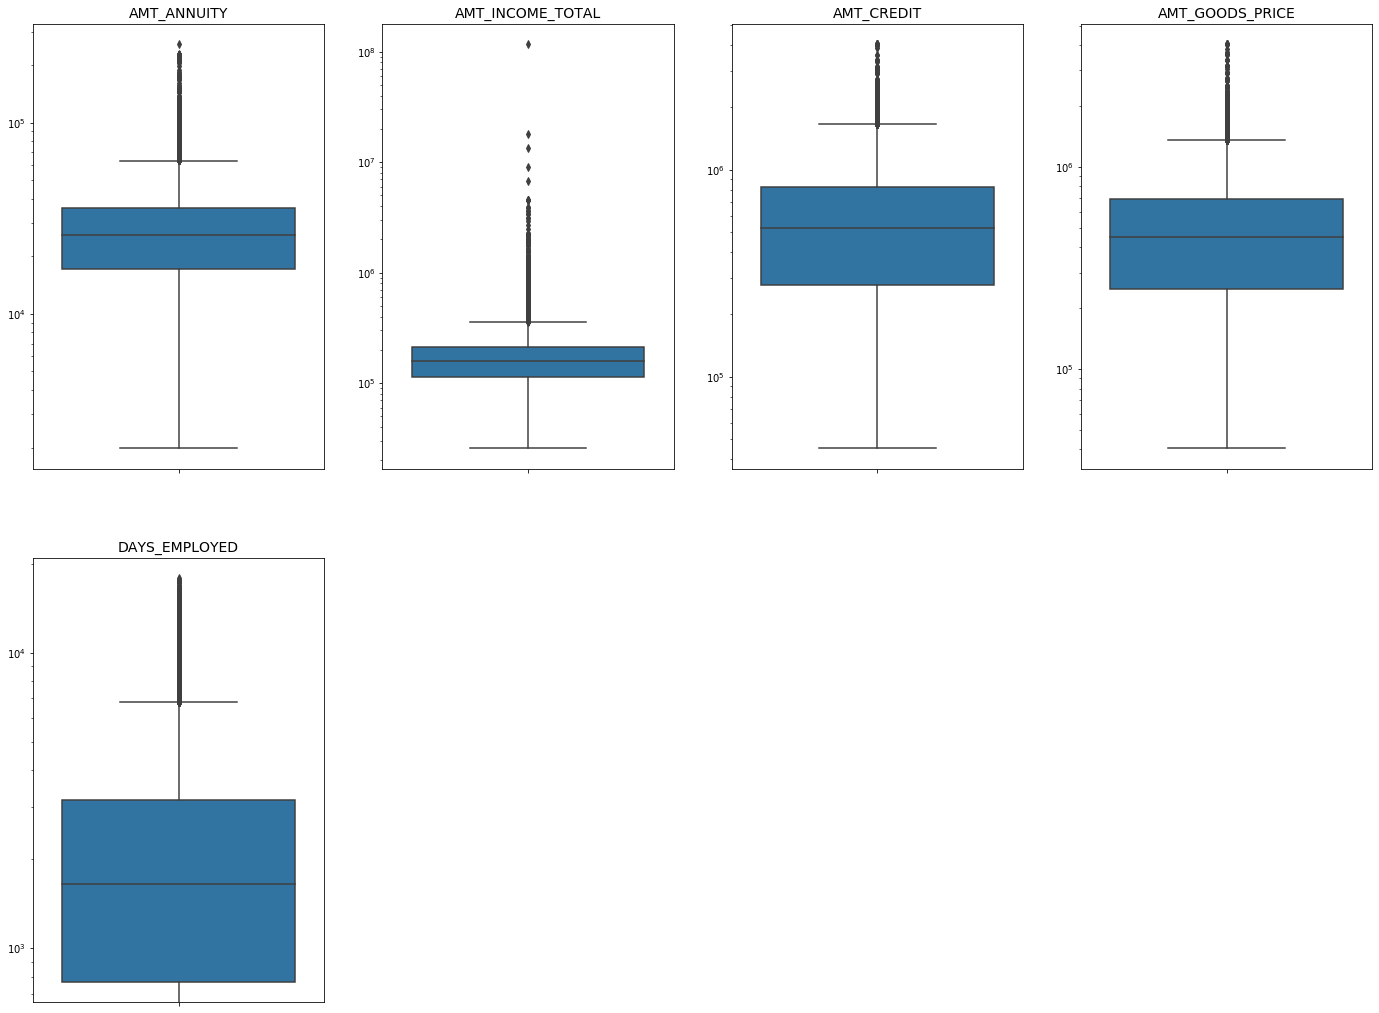

In [32]:
plt.figure(figsize=(24,18))

app_outlier_col_1 = ['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_EMPLOYED']
for i in enumerate(app_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=app[i[1]])
    plt.title(i[1],fontsize=14)
    plt.yscale('log')
    plt.ylabel("")

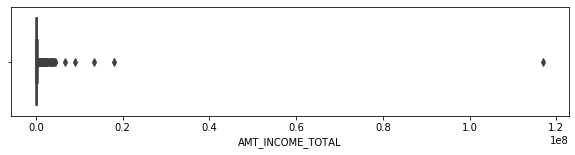

In [33]:
plt.figure(figsize=(10,2))
sns.boxplot(app.AMT_INCOME_TOTAL)
plt.show()

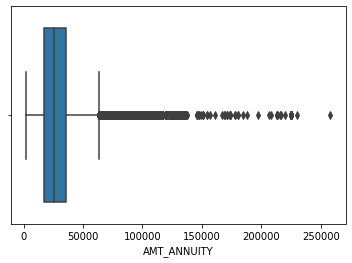

In [34]:
sns.boxplot(app.AMT_ANNUITY)
plt.show()

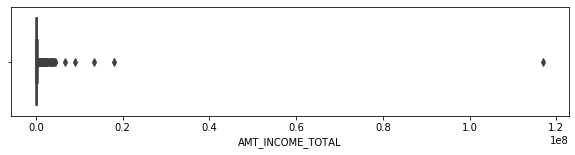

In [35]:
plt.figure(figsize=(10,2))
sns.boxplot(app.AMT_INCOME_TOTAL)
plt.show()

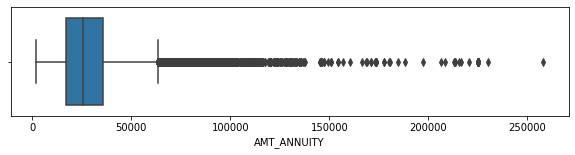

In [36]:
plt.figure(figsize=(10,2))
sns.boxplot(app.AMT_ANNUITY)
plt.show()

In [37]:
#Excluding values outside 99%ile 
app=app[app.AMT_ANNUITY<np.nanpercentile(app['AMT_ANNUITY'], 99)]
app=app[app.AMT_INCOME_TOTAL<np.nanpercentile(app['AMT_INCOME_TOTAL'], 99)]
app=app[app.AMT_ANNUITY<np.nanpercentile(app['AMT_CREDIT'], 99)]
app=app[app.AMT_INCOME_TOTAL<np.nanpercentile(app['AMT_GOODS_PRICE'], 99)]

Some outliers are noticed in annuity amount.
The first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile.

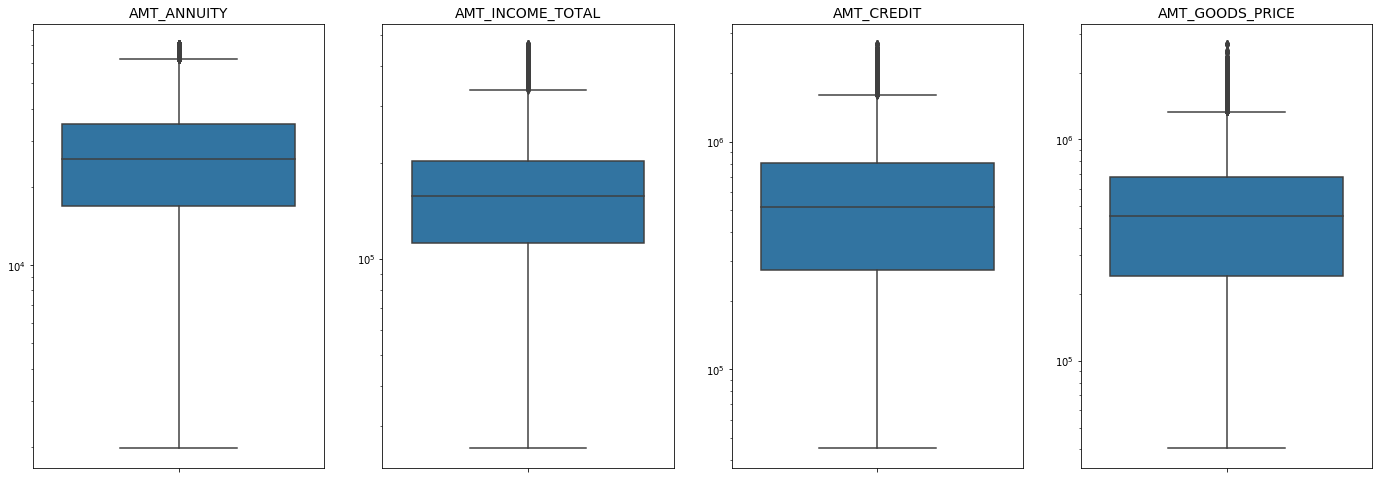

In [38]:
#after removing outliers.
plt.figure(figsize=(24,18))
app_outlier_col_1 = ['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE']
for i in enumerate(app_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=app[i[1]])
    plt.title(i[1],fontsize=14)
    plt.yscale('log')
    plt.ylabel("")

***Imbalance check***

In [39]:
# Dividing the dataset into two dataset
#target=1 =payment defaults
#target=0=without payment defaults
app_target0=app.loc[app["TARGET"]==0]
app_target1=app.loc[app["TARGET"]==1]
print(len(app_target0))
print(len(app_target1))

225463
21590


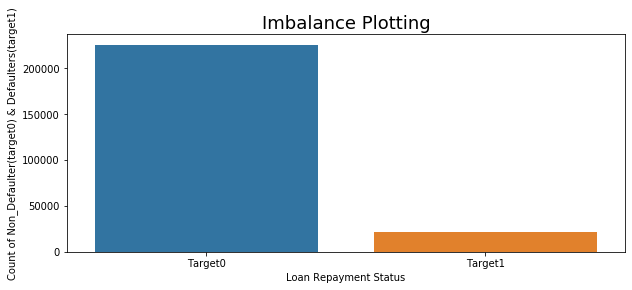

In [40]:
Imbalance = app["TARGET"].value_counts().reset_index()

plt.figure(figsize=(10,4))
x= ['Target0','Target1']
sns.barplot(x,"TARGET",data = Imbalance)
plt.xlabel("Loan Repayment Status")
plt.ylabel("Count of Non_Defaulter(target0) & Defaulters(target1)", fontsize=10)
plt.title("Imbalance Plotting", fontsize=18)
plt.show()

In [41]:
#Imbalance percentage
#As seen target0 is more than target1
round(len(app_target0)/len(app_target1),2)

10.44

The Imbalance percentage is 10.44

**Univariate analysis**

In [42]:
bins=[0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots=['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']
app_target0['AMT_CREDIT_BIN']=pd.cut(app_target0['AMT_CREDIT'],bins,labels=slots)
app_target1['AMT_CREDIT_BIN']=pd.cut(app_target1['AMT_CREDIT'],bins,labels=slots)
app_target0['AMT_CREDIT_BIN'].value_counts()

900000 and above    44430
250000-300000       22643
500000-550000       16193
200000-250000       15966
400000-450000       13908
150000-200000       13587
0-150000            12568
300000-350000       12003
650000-700000       10973
450000-500000       10162
750000-800000        8842
800000-850000        8566
550000-600000        8432
850000-900000        8205
350000-400000        7499
600000-650000        6638
700000-750000        4848
Name: AMT_CREDIT_BIN, dtype: int64

In [43]:
#Creating binned for income_total
bins=[0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots=['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']
app_target0['AMT_INCOME']=pd.cut(app_target0['AMT_INCOME_TOTAL'],bins,labels=slots)
app_target1['AMT_INCOME']=pd.cut(app_target1['AMT_INCOME_TOTAL'],bins,labels=slots)
#app_target0['AMT_INCOME'].value_counts()

**Univariate Analysis**

In [44]:
def univplot(var):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    #sns.countplot(var, data=app_target0)
    sns.countplot(var,data=app_target0)
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel('Number of cases for non-defaulters')
    plt.subplot(1, 2, 2)
    sns.countplot(var,data=app_target1)
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel('Number of cases for defaulters')
plt.show()

In [45]:
def bivplot(var):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    #sns.countplot(var, data=app_target0)
    sns.countplot(var,hue='CODE_GENDER',data=app_target0)
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel('Number of cases for non-defaulters')
    plt.subplot(1, 2, 2)
    sns.countplot(var,hue='CODE_GENDER',data=app_target1)
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel('Number of cases for defaulters')
plt.show()

***Categorical Ordered Univariate Analysis***

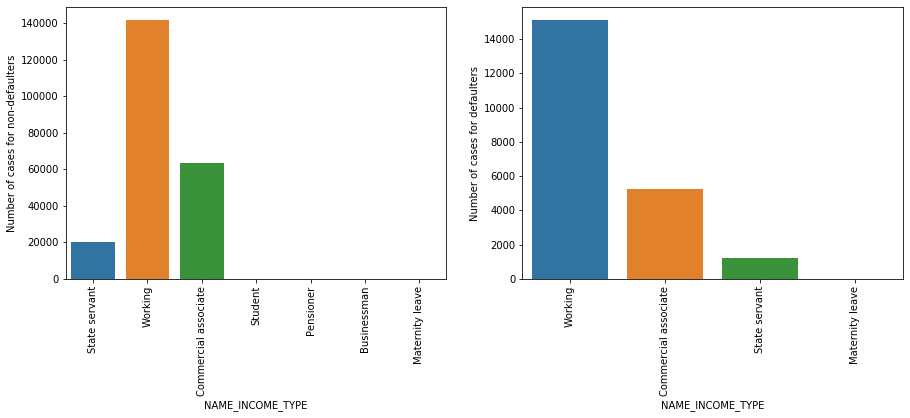

In [46]:
#comparing name_income_type
univplot("NAME_INCOME_TYPE")

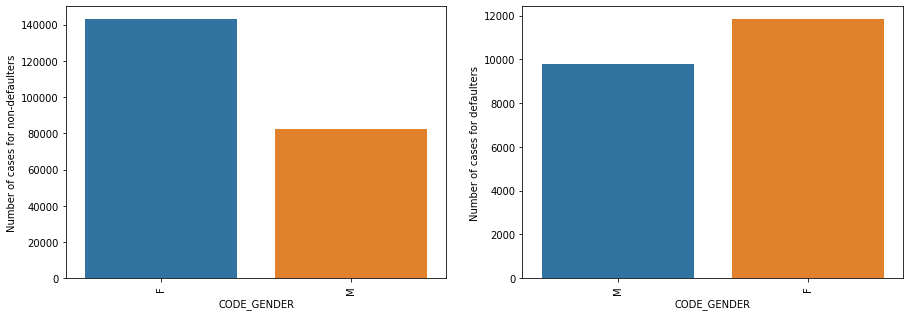

In [47]:
# Checking the type of Gender on loan repayment status
univplot('CODE_GENDER')

***Inference***
1. For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than other i.e.   ‘Maternity leave,"student.
2. For Defaults = There is no income type for ‘student’ , ’pensioner’ and ‘Businessman’ which means they don’t do any late payments.
3. Female gender is having more in both defaulters and non-defaulters.
4. Working population are having most defaulters compared to others. 


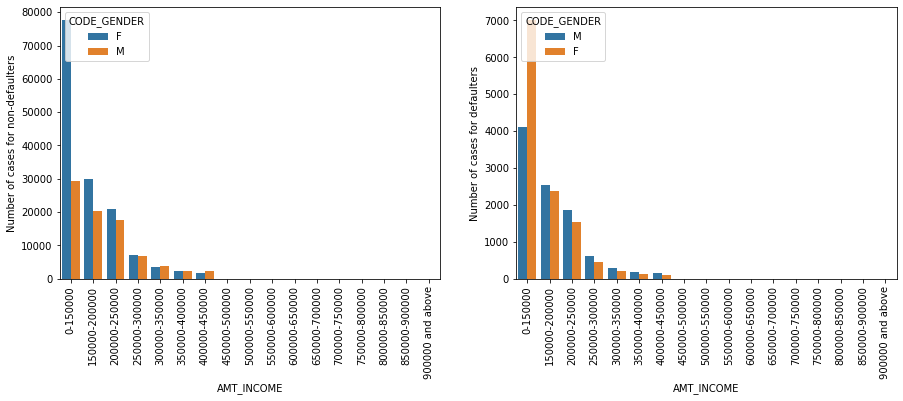

In [48]:
bivplot("AMT_INCOME")

**Inference**
1. Female counts are higher than male for both Non-Defaulters(Loan_repaid) and Defaulters.
2. Most people fall into -Income range from 100000 to 200000 .
3. Most Defaulters are of Income below 15000.
4. This graph show that females are more than male in having credits in almost every range.
5. Very less count of people for income range 400000 and above.

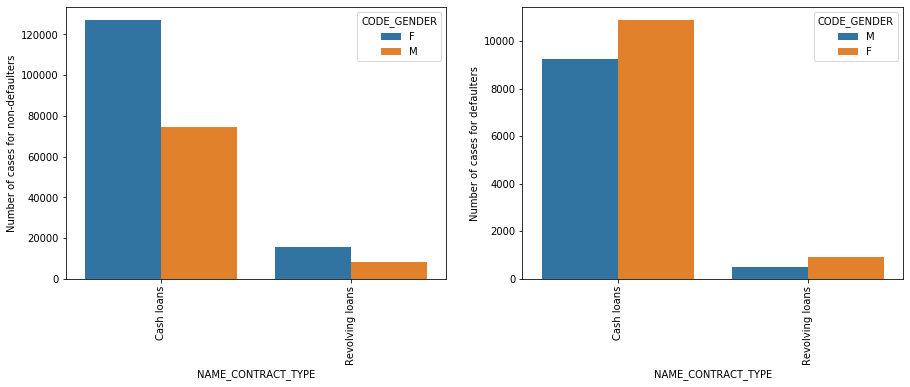

In [49]:
bivplot("NAME_CONTRACT_TYPE")

**inference**
1. For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.
2. Female is leading for applying credits and cash loan is defaulted more by them.
3. Revolving loans are just a small fraction (10%) from the total number of loans; in the same time, a larger amount of Revolving loans, comparing with their frequency, are not repaid.

***Categorical Unordered Variables Analysis***

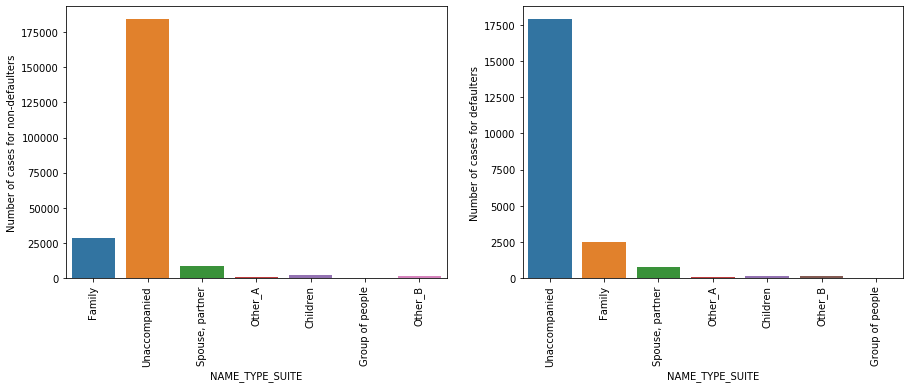

In [50]:
univplot("NAME_TYPE_SUITE")

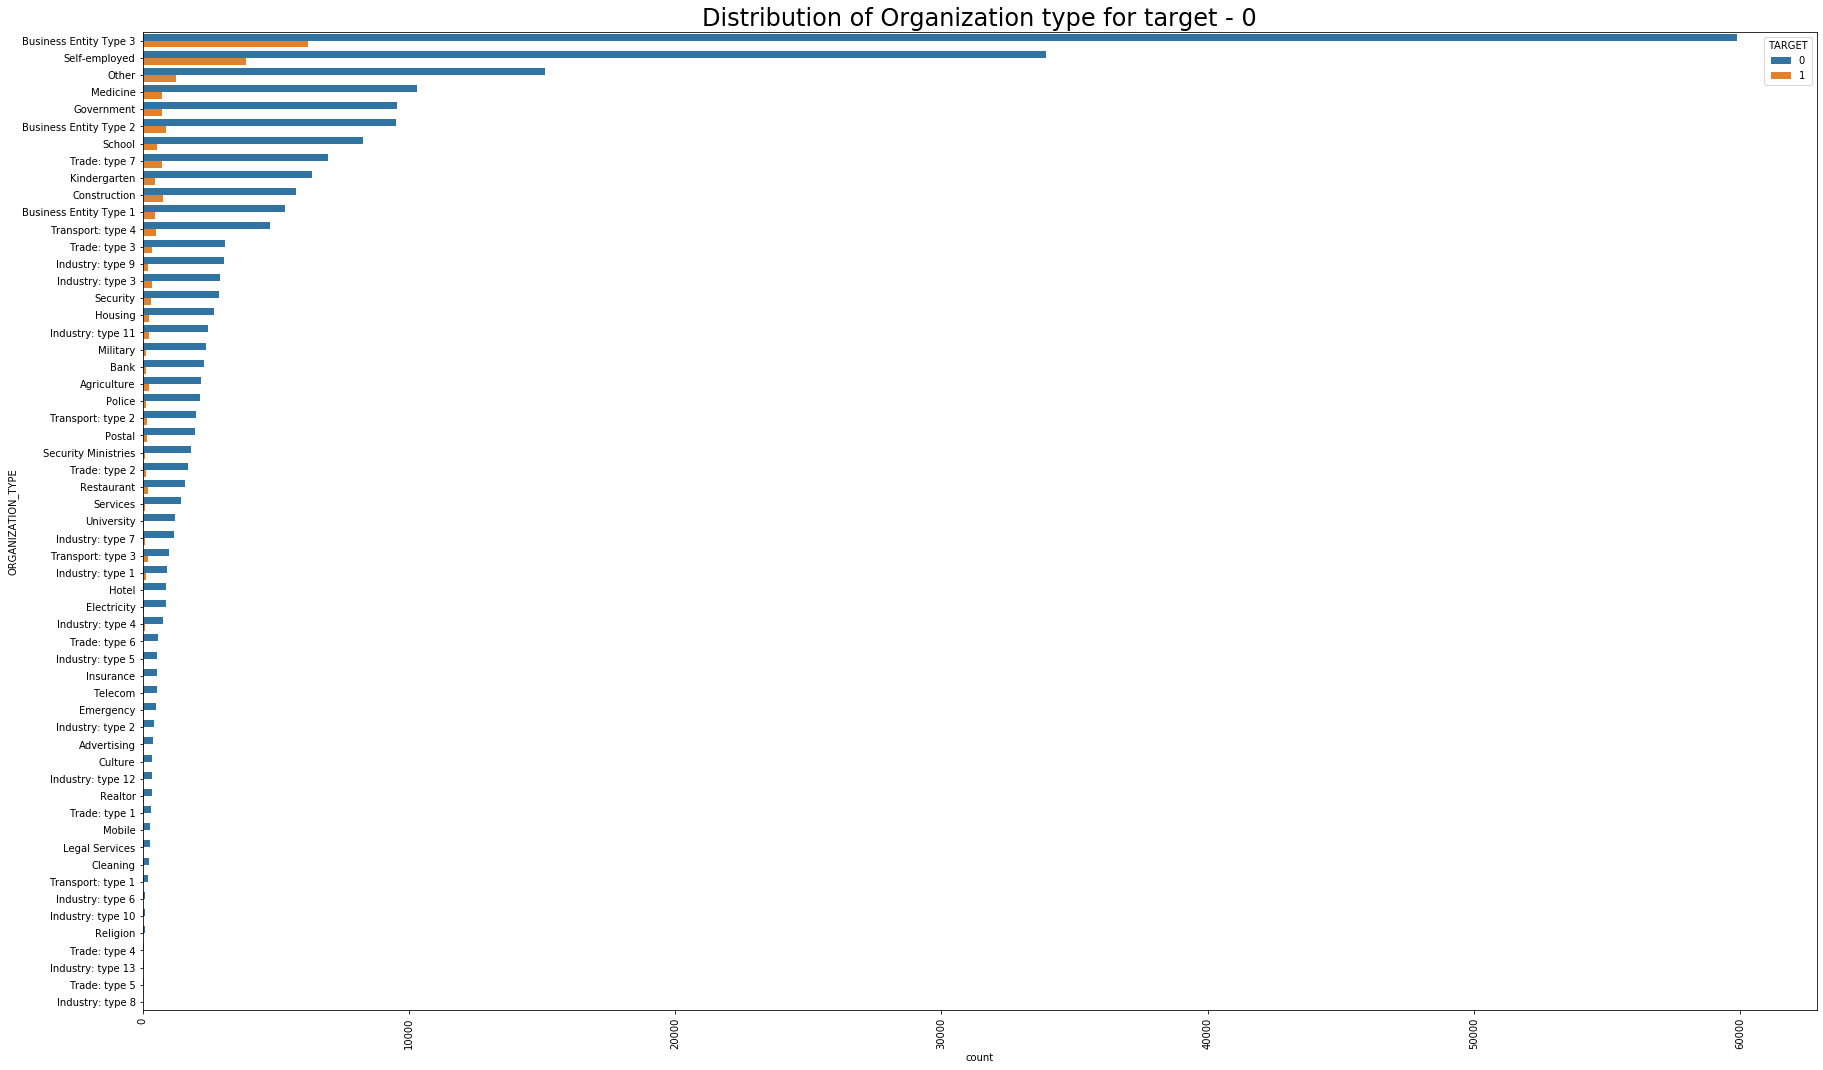

In [51]:
# Plotting for Organization type 
#sns.set_style('whitegrid')
#sns.set_context('talk')
plt.figure(figsize=(30,18))
plt.title("Distribution of Organization type for target - 0", fontsize=24)
plt.xticks(rotation=90)
sns.countplot(data=app,y='ORGANIZATION_TYPE',hue='TARGET',order=app_target0['ORGANIZATION_TYPE'].value_counts().index)
plt.show()

**Inference**
1. Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self mployed’,‘Other’ , ‘Medicine’ and ‘Government’.

2. Less clients are from Industry type 8,type 6, type 10, religion and trade type 5, type 4.
3. Organizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%). Self employed people have relative high defaulting rate, and thus should be avoided to be approved for loan or provide loan with higher interest rate to mitigate the risk of defaulting.
4. Most of the people application for loan are from Business Entity Type 3

***Ordered categorical variables**

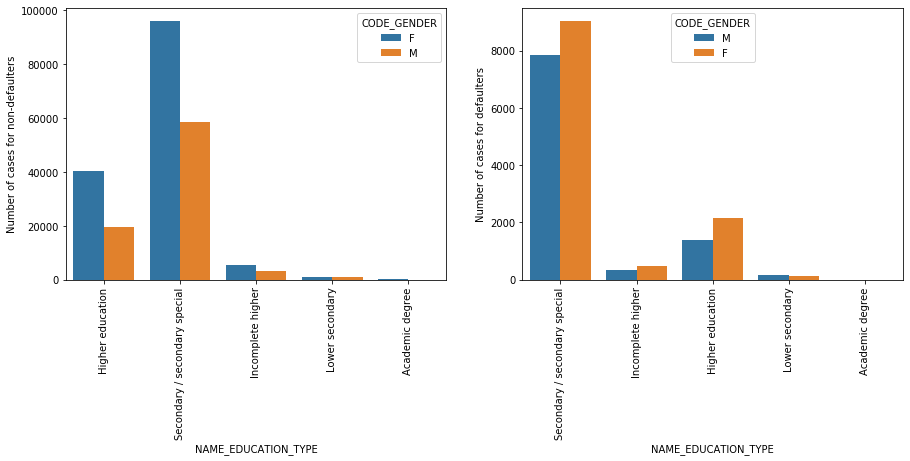

In [52]:
bivplot('NAME_EDUCATION_TYPE')

In [53]:
Income_def=app_target1.AMT_INCOME.value_counts(normalize=True)
Income_NonDef=app_target0.AMT_INCOME.value_counts(normalize=True)
print(Income_def, Income_NonDef)

0-150000            0.515285
150000-200000       0.227513
200000-250000       0.157758
250000-300000       0.050069
300000-350000       0.023066
350000-400000       0.014266
400000-450000       0.011857
450000-500000       0.000185
900000 and above    0.000000
850000-900000       0.000000
550000-600000       0.000000
600000-650000       0.000000
650000-700000       0.000000
700000-750000       0.000000
750000-800000       0.000000
800000-850000       0.000000
500000-550000       0.000000
Name: AMT_INCOME, dtype: float64 0-150000            0.475182
150000-200000       0.222161
200000-250000       0.170942
250000-300000       0.061065
300000-350000       0.032236
350000-400000       0.020873
400000-450000       0.017386
450000-500000       0.000155
900000 and above    0.000000
850000-900000       0.000000
550000-600000       0.000000
600000-650000       0.000000
650000-700000       0.000000
700000-750000       0.000000
750000-800000       0.000000
800000-850000       0.000000
500000-550

***Inference**
Higher Education is more in non-defaulters.Even the Income earning above by the non-defaulter above 500000 is more. 
So, Higher Education lead to more income , hence less defaults.

<Figure size 2160x1296 with 0 Axes>

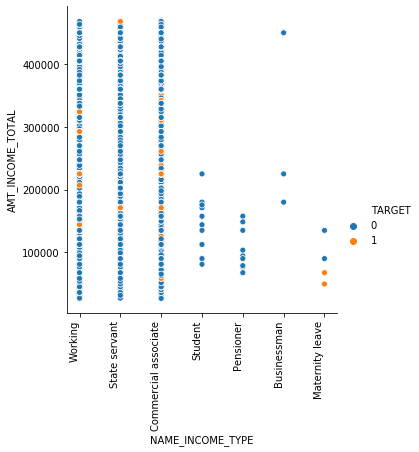

In [55]:
# Income type vs Income Amount Range
plt.figure(figsize=(30,18))
sns.relplot(x='NAME_INCOME_TYPE', 
                y='AMT_INCOME_TOTAL', 
                data=app, 
                hue="TARGET")
plt.xticks(rotation=90, ha='right')
plt.show()

**Inference**
1. Businessman,student, Pensions has the lowest defaults.
2. Working Class, Commercial associate & state servant is having the highest defaults.

**Correlation**

In [56]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

num_target0 = app_target0.select_dtypes(include=numerics)
num_target1 = app_target1.select_dtypes(include=numerics)
num_target0.dtypes.value_counts()

int64      14
float64     6
dtype: int64

In [57]:
target0_corr = num_target0.corr()
target1_corr = num_target1.corr()

In [58]:
target0_corr = target0_corr.round(decimals=2)
target1_corr = target1_corr.round(decimals=2)
target0_corr

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_2   AGE
SK_ID_CURR                          1.0     NaN         -0.00              0.00       -0.00         0.00             0.00                        0.00           0.00              -0.00            -0.00                    -0.00                        0.00                        0.00                         0.00                   -0.00                   -0.00                     0.00          0.00 -0.00
TARGET                              NaN     NaN           NaN               NaN         NaN          NaN              NaN                         NaN            NaN                NaN              NaN                      NaN                         NaN                         NaN                          NaN                     NaN                     NaN                      NaN           NaN   NaN
CNT_CHILDREN                       -0.0     NaN          1.00             -0.02       -0.02        -0.01            -0.02                       -0.03          -0.06              -0.16             0.12                    -0.03                       -0.02                       -0.02                        -0.01                   -0.00                    0.01                     0.02         -0.03  0.24
AMT_INCOME_TOTAL                    0.0     NaN         -0.02              1.00        0.37         0.44             0.38                        0.18           0.04              -0.04             0.03                     0.06                        0.08                        0.16                         0.15                   -0.00                   -0.02                    -0.01          0.16 -0.05
AMT_CREDIT                         -0.0     NaN         -0.02              0.37        1.00         0.78             0.99                        0.09           0.09               0.02             0.03                     0.04                        0.01                        0.04                         0.04                   -0.04                   -0.03                    -0.01          0.13 -0.15
AMT_ANNUITY                         0.0     NaN         -0.01              0.44        0.78         1.00             0.78                        0.10           0.05              -0.01             0.02                     0.03                        0.03                        0.07                         0.06                   -0.02                   -0.02                    -0.01          0.12 -0.09
AMT_GOODS_PRICE                     0.0     NaN         -0.02              0.38        0.99         0.78             1.00                        0.09           0.09               0.02             0.04                     0.05                        0.02                        0.04                         0.04                   -0.04                   -0.04                    -0.01          0.13 -0.15
REGION_POPULATION_RELATIVE          0.0     NaN         -0.03              0.18        0.09         0.10             0.09                        1.00          -0.01               0.06             0.00                     0.17                       -0.00                        0.06                         0.09                   -0.05                   -0.05                    -0.01          0.20 -0.04
DAYS_EMPLOYED                       0.0     NaN         -0.06              0.04        0.09         0.05             0.09                       -0.01           1.00               0.17             0.09                    -0.02                       -0.06                       -0.08                        -0.06                   -0.11                   -0.13                    -0.08          

In [59]:
target1_corr

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_2   AGE
SK_ID_CURR                         1.00     NaN         -0.01             -0.00       -0.00        -0.01            -0.00                        0.01          -0.00              -0.00             0.00                     0.00                       -0.01                        0.00                         0.00                    0.01                   -0.00                    -0.00          0.01 -0.00
TARGET                              NaN     NaN           NaN               NaN         NaN          NaN              NaN                         NaN            NaN                NaN              NaN                      NaN                         NaN                         NaN                          NaN                     NaN                     NaN                      NaN           NaN   NaN
CNT_CHILDREN                      -0.01     NaN          1.00             -0.03       -0.00         0.02            -0.01                       -0.03          -0.03              -0.13             0.09                    -0.04                       -0.03                       -0.04                        -0.03                   -0.02                    0.00                     0.02         -0.01  0.18
AMT_INCOME_TOTAL                  -0.00     NaN         -0.03              1.00        0.34         0.41             0.34                        0.11           0.03              -0.01             0.04                     0.07                        0.08                        0.16                         0.15                   -0.01                   -0.01                     0.00          0.14 -0.10
AMT_CREDIT                        -0.00     NaN         -0.00              0.34        1.00         0.75             0.98                        0.07           0.11               0.03             0.06                     0.03                        0.01                        0.03                         0.03                   -0.04                   -0.04                    -0.02          0.12 -0.19
AMT_ANNUITY                       -0.01     NaN          0.02              0.41        0.75         1.00             0.75                        0.07           0.05              -0.02             0.04                     0.02                        0.03                        0.06                         0.06                   -0.01                   -0.02                    -0.00          0.11 -0.09
AMT_GOODS_PRICE                   -0.00     NaN         -0.01              0.34        0.98         0.75             1.00                        0.07           0.11               0.03             0.06                     0.04                        0.02                        0.04                         0.04                   -0.04                   -0.04                    -0.02          0.13 -0.19
REGION_POPULATION_RELATIVE         0.01     NaN         -0.03              0.11        0.07         0.07             0.07                        1.00           0.02               0.06             0.01                     0.14                       -0.02                        0.02                         0.05                   -0.06                   -0.05                    -0.02          0.16 -0.05
DAYS_EMPLOYED                     -0.00     NaN         -0.03              0.03        0.11         0.05             0.11                        0.02           1.00               0.14             0.10                    -0.00                       -0.06                       -0.07                        -0.05                   -0.11                   -0.14                    -0.07          

In [60]:
# Now, plotting the above correlation with heat map

# figure size

def targets_corr(data,title):
    plt.figure(figsize=(25, 10))
    plt.rcParams['axes.titlesize'] = 8
    #plt.rcParams['axes.titlepad'] = 70
    T0=sns.heatmap(data, cmap="Greens",annot=True)
    plt.title(title,fontsize=20)
    plt.yticks(rotation=0)
    plt.show()

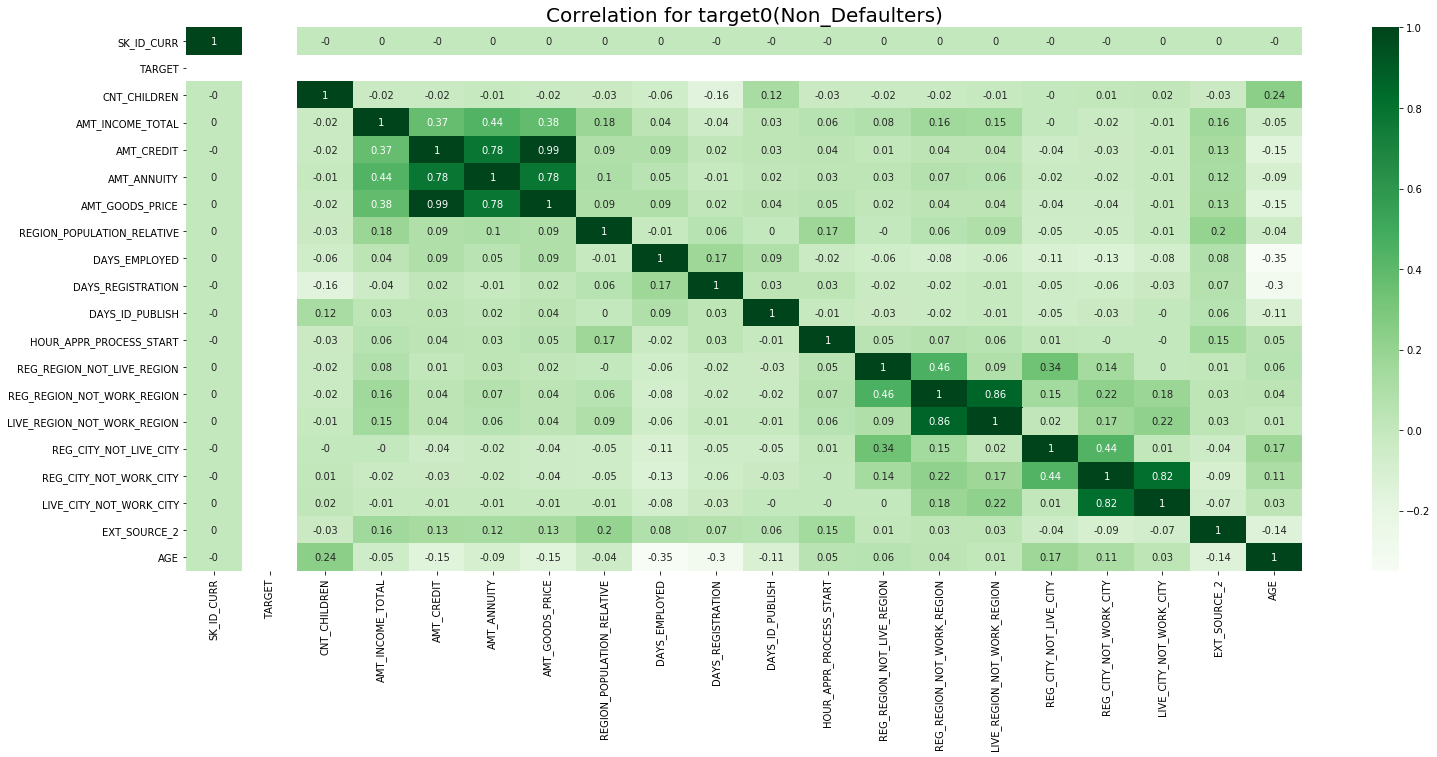

In [61]:
targets_corr(data=target0_corr,title='Correlation for target0(Non_Defaulters)')

In [62]:
# Getting the top 10 correlation for the Repayers data
corr_repayer = target0_corr.corr()
corr_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool))
corr_df_repayer = corr_repayer.unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs() 
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.head(10)

VAR1                        VAR2  Correlation
124              AMT_GOODS_PRICE                  AMT_CREDIT     0.999851
125              AMT_GOODS_PRICE                 AMT_ANNUITY     0.965081
104                  AMT_ANNUITY                  AMT_CREDIT     0.964866
293  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.938483
356      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY     0.914750
103                  AMT_ANNUITY            AMT_INCOME_TOTAL     0.697688
388                          AGE               DAYS_EMPLOYED     0.669381
123              AMT_GOODS_PRICE            AMT_INCOME_TOTAL     0.638439
83                    AMT_CREDIT            AMT_INCOME_TOTAL     0.633687
389                          AGE           DAYS_REGISTRATION     0.589444

**Inferences:**
Correlating factors amongst repayers:
Credit amount is highly correlated with
  amount of goods price
  loan annuity
  total income

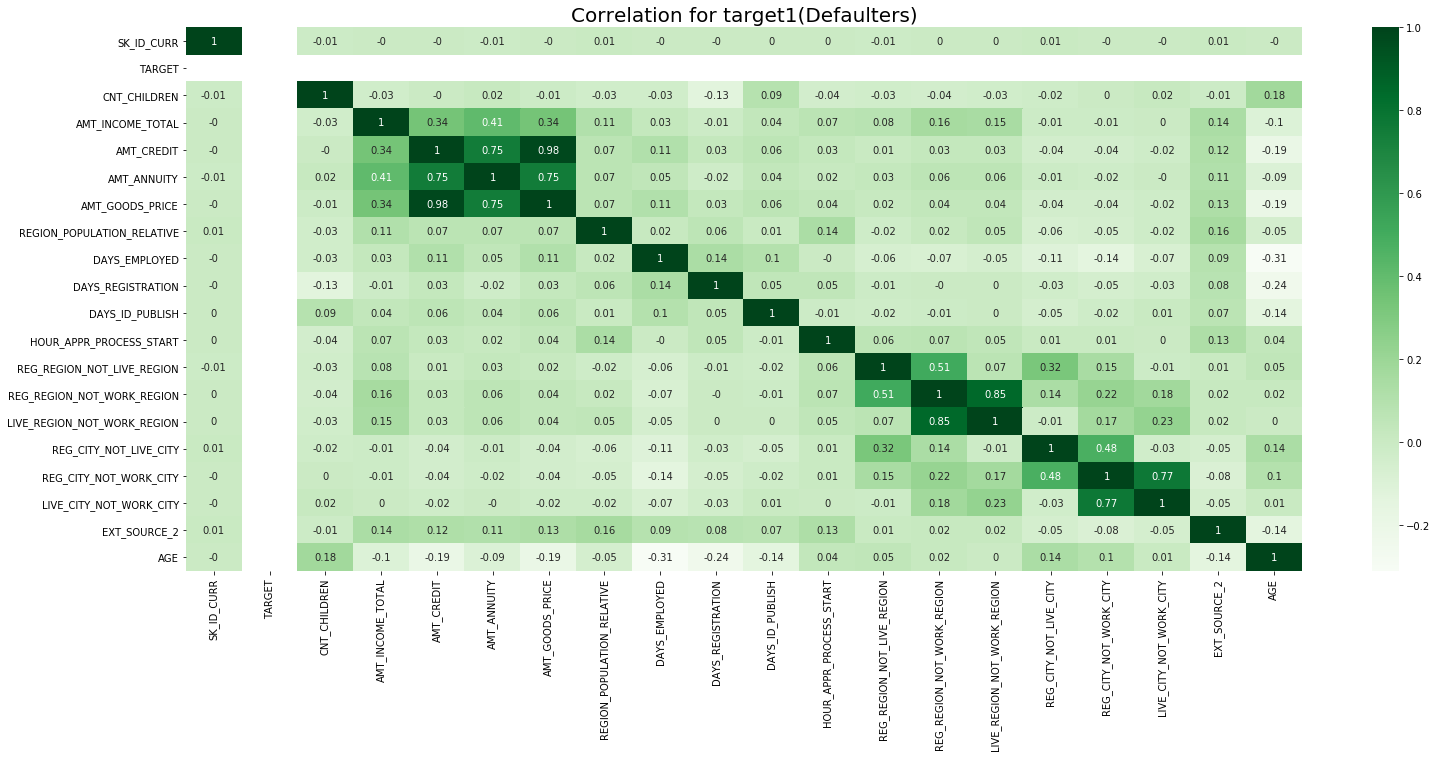

In [63]:
targets_corr(data=target1_corr,title='Correlation for target1(Defaulters)')

In [64]:
# Getting the top 10 correlation for the Repayers data
corr_repayer = target1_corr.corr()
corr_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool))
corr_df_repayer = corr_repayer.unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs() 
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.head(10)

VAR1                        VAR2  Correlation
124              AMT_GOODS_PRICE                  AMT_CREDIT     0.999696
104                  AMT_ANNUITY                  AMT_CREDIT     0.952444
125              AMT_GOODS_PRICE                 AMT_ANNUITY     0.952272
293  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.918686
356      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY     0.872961
103                  AMT_ANNUITY            AMT_INCOME_TOTAL     0.656925
388                          AGE               DAYS_EMPLOYED     0.614108
272   REG_REGION_NOT_WORK_REGION  REG_REGION_NOT_LIVE_REGION     0.602250
123              AMT_GOODS_PRICE            AMT_INCOME_TOTAL     0.592096
83                    AMT_CREDIT            AMT_INCOME_TOTAL     0.590495

The client's permanent address does not match contact address are having less children and vice-versa
the client's permanent address does not match work address are having less children and vice-versa

***Bivariate analysis for numerical variables***

Target 0


plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =app_target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

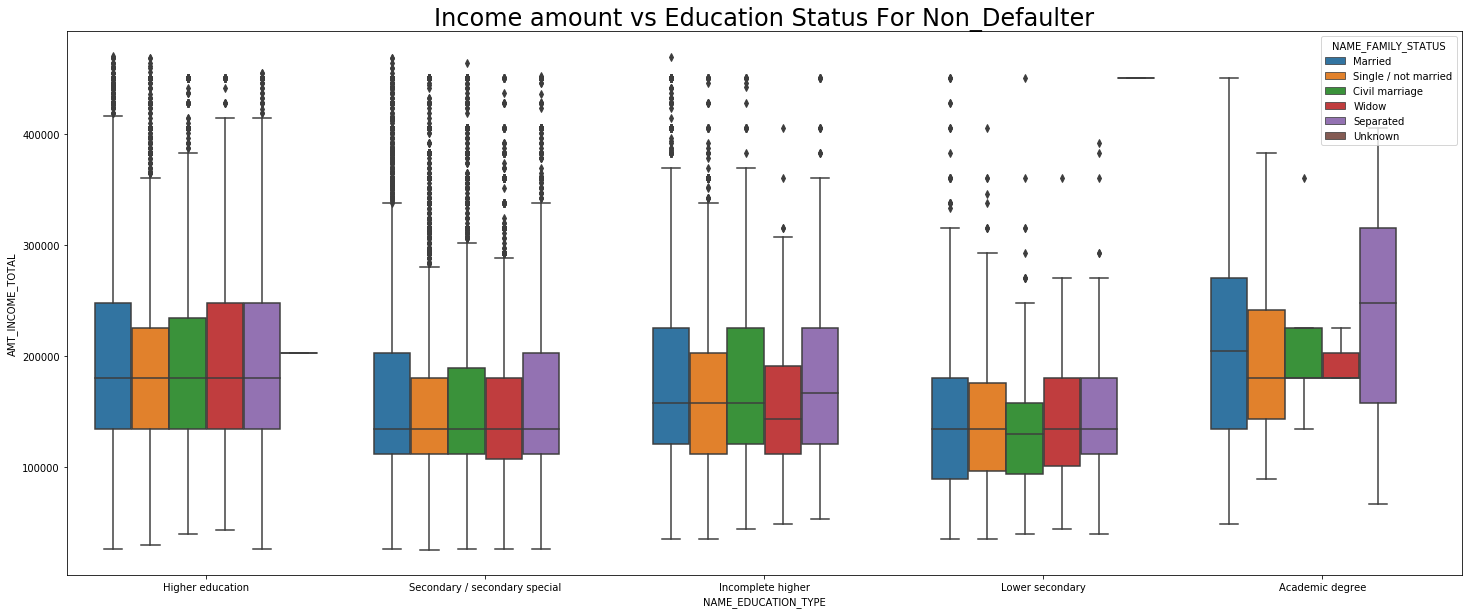

In [65]:
plt.figure(figsize=(25,10))
plt.yscale('linear')
sns.boxplot(data =app_target0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS')
plt.title('Income amount vs Education Status For Non_Defaulter',fontsize=24)
plt.show()

**Inference**
1. Also, higher education of family status of 'marriage', 'single' and 'civil marriage' are having more outliers. 
2. Civil marriage for Academic degree is having most of the credits in the third quartile.
3. Academic Degree have more AMT INCOME than other Categories.
4. Seperated Academic degree holders have highest income median.

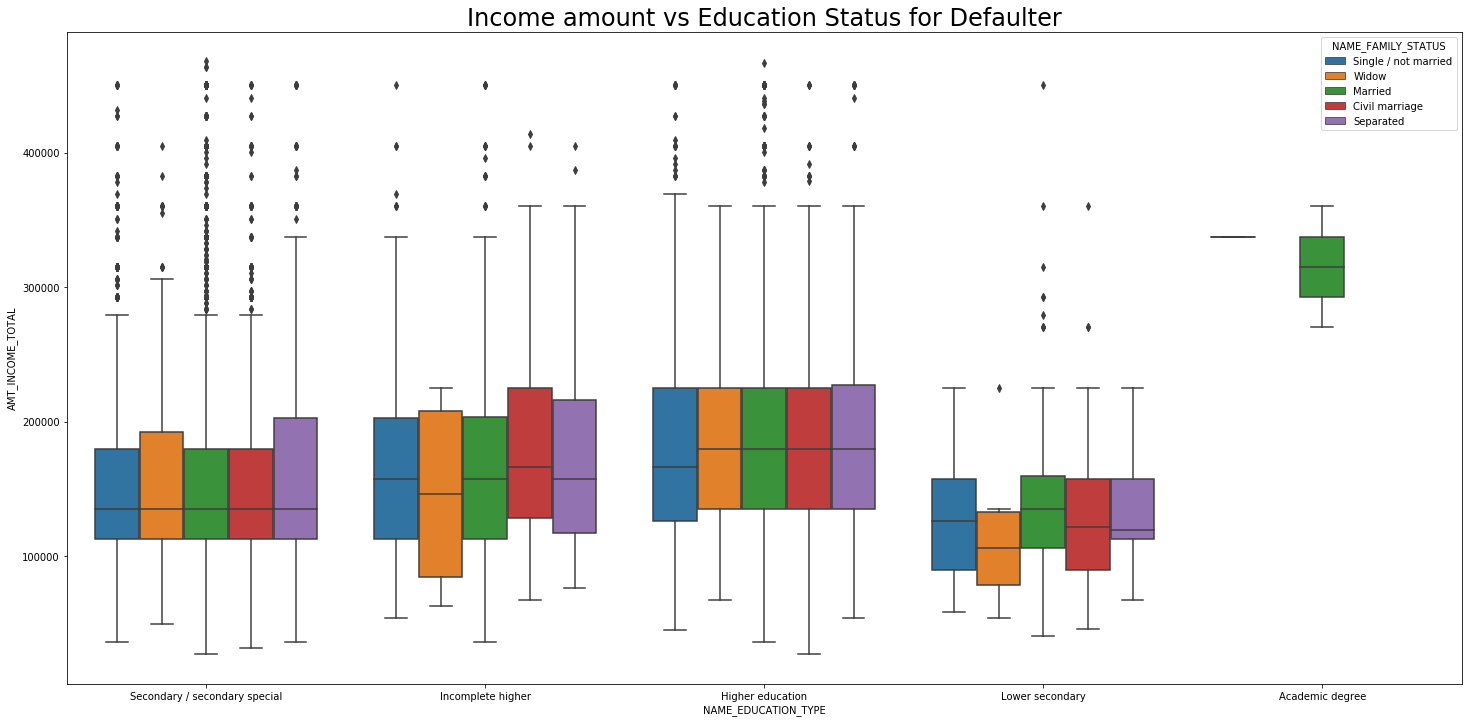

In [66]:
plt.figure(figsize=(25,12))
plt.yscale('linear')
sns.boxplot(data =app_target1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status for Defaulter',fontsize=24)
plt.show()

In [67]:
prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [68]:
prev.dtypes.value_counts()

object     16
float64    15
int64       6
dtype: int64

In [69]:
((prev.isnull().sum()*100)/len(prev)).round(2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [70]:
print((prev.isnull().sum()))

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [71]:
prev.dtypes.value_counts()

object     16
float64    15
int64       6
dtype: int64

In [72]:
#Removing columns having more than 30% missing values
prev1= prev.loc[:, prev.isnull().mean() <= .30]
prev1.shape

(1670214, 26)

In [73]:
prev1.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'], dtype='object')

In [74]:
prev1.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

In [75]:
prev1=prev1.drop(prev1[prev1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
prev1=prev1.drop(prev1[prev1['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)
prev1.shape

(69635, 26)

In [76]:
New_Comb = pd.merge(app, prev1, how='left', on=['SK_ID_CURR'])

In [77]:
New_Comb.shape

(267185, 57)

In [78]:
New_Comb.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'WEEKDAY_APPR_PROCESS_START_x', 'HOUR_APPR_PROCESS_START_x', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'AGE', 'AGE_GROUP', 'SK_ID_PREV', 'NAME_CONTRACT_TYPE_y', 'AMT_ANNUITY_y', 'AMT_APPLICATION', 'AMT_CREDIT_y', 'AMT_GOODS_PRICE_y', 'WEEKDAY_APPR_PROCESS_START_y', 'HOUR_APPR_PROCESS_START_y', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       '

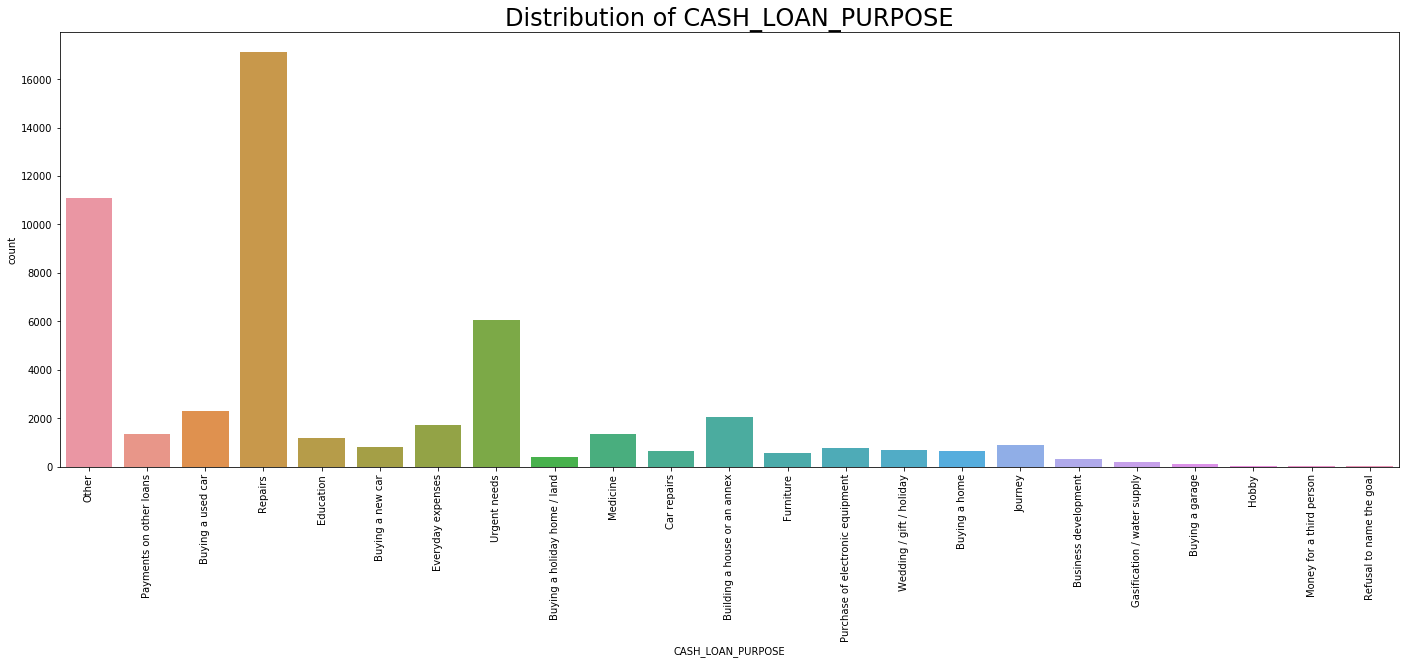

In [79]:
plt.figure(figsize=(24,8))
sns.countplot(New_Comb.NAME_CASH_LOAN_PURPOSE,data=New_Comb)
plt.xticks(rotation=90)
plt.xlabel("CASH_LOAN_PURPOSE")
#plt.ylabel("Count of Contract Status")
plt.title("Distribution of CASH_LOAN_PURPOSE", fontsize=24)
plt.show()

**Inference:-**
1. Highest Loan are processed for Repairs.Followed by Other and Urgent needs.
2. For Hobby, Money for third person and Refusal to name the goal have very less application

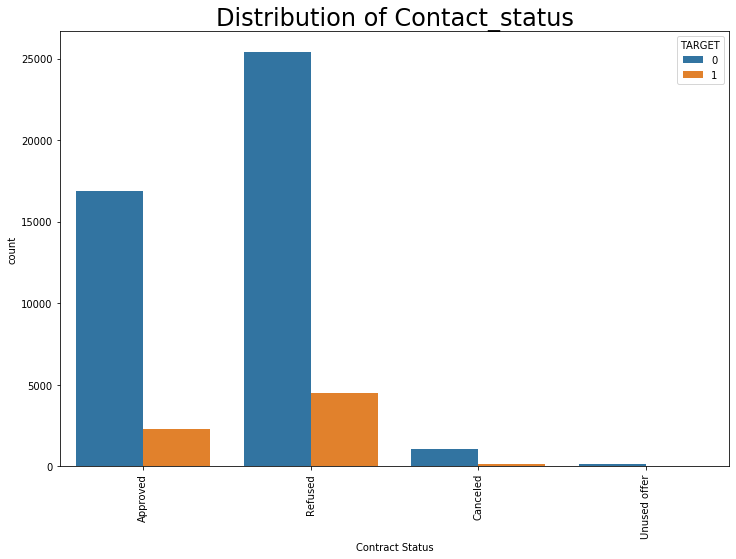

In [80]:
plt.figure(figsize=(12,8))
sns.countplot(New_Comb.NAME_CONTRACT_STATUS,hue='TARGET',data=New_Comb)
plt.xticks(rotation=90)
plt.xlabel("Contract Status")
#plt.ylabel("Count of Contract Status")
plt.title("Distribution of Contact_status", fontsize=24)
plt.show()

Inference:-
Contact_status shows that highest refused is for non-defaulters.Also, Refused is highest for defaulter as well.
Non-Defaulter have higher approval count compared to non-defaulters.


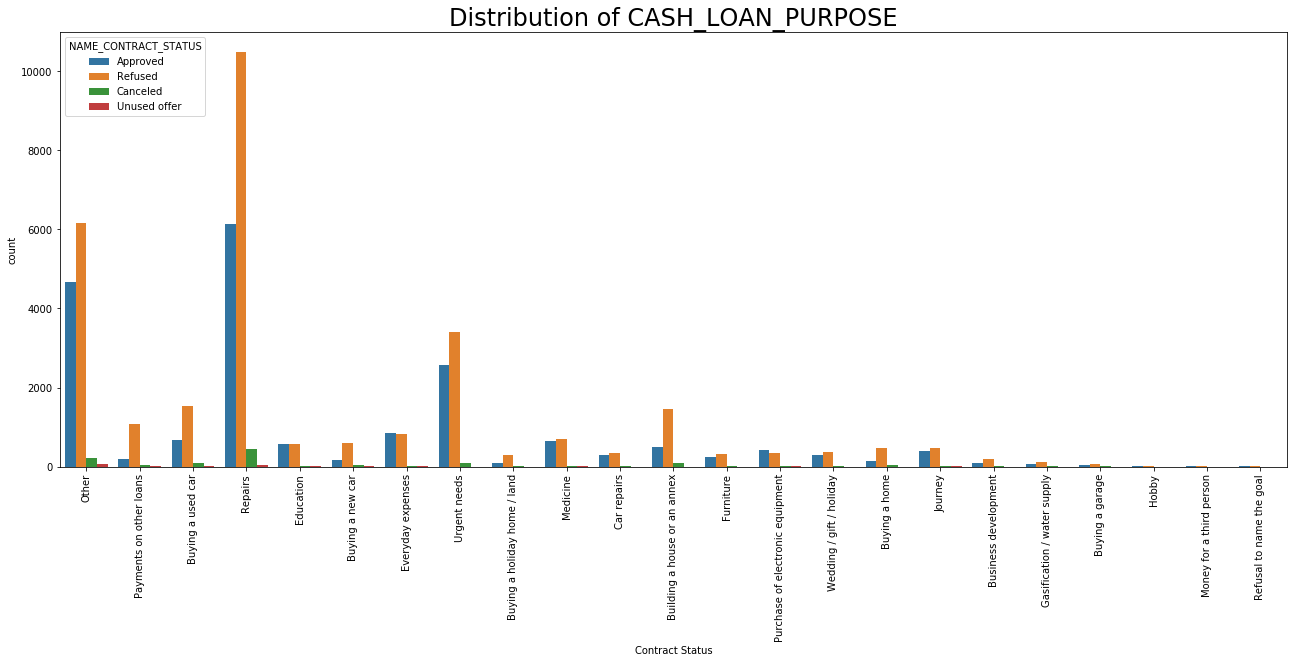

In [81]:
plt.figure(figsize=(22,8))
sns.countplot(New_Comb.NAME_CASH_LOAN_PURPOSE,hue='NAME_CONTRACT_STATUS',data=New_Comb)
plt.xticks(rotation=90)
plt.xlabel("Contract Status")
#plt.ylabel("Count of Contract Status")
plt.title("Distribution of CASH_LOAN_PURPOSE", fontsize=24)
plt.show()

Inference:-
Loan taken for the purpose of Repairs seems to have highest default rate
A very high number application have been rejected by bank or refused by client which has purpose as repair or other. This shows that purpose repair is taken as high risk by bank and either they are rejected or bank offers very high loan interest rate which is not feasible by the clients, thus they refuse the loan.

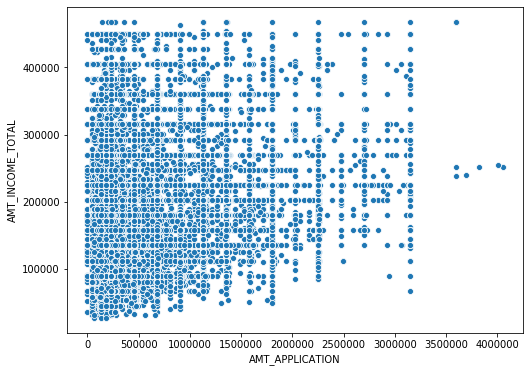

In [82]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.scatterplot(x='AMT_APPLICATION',y='AMT_INCOME_TOTAL',data=New_Comb)
plt.show()

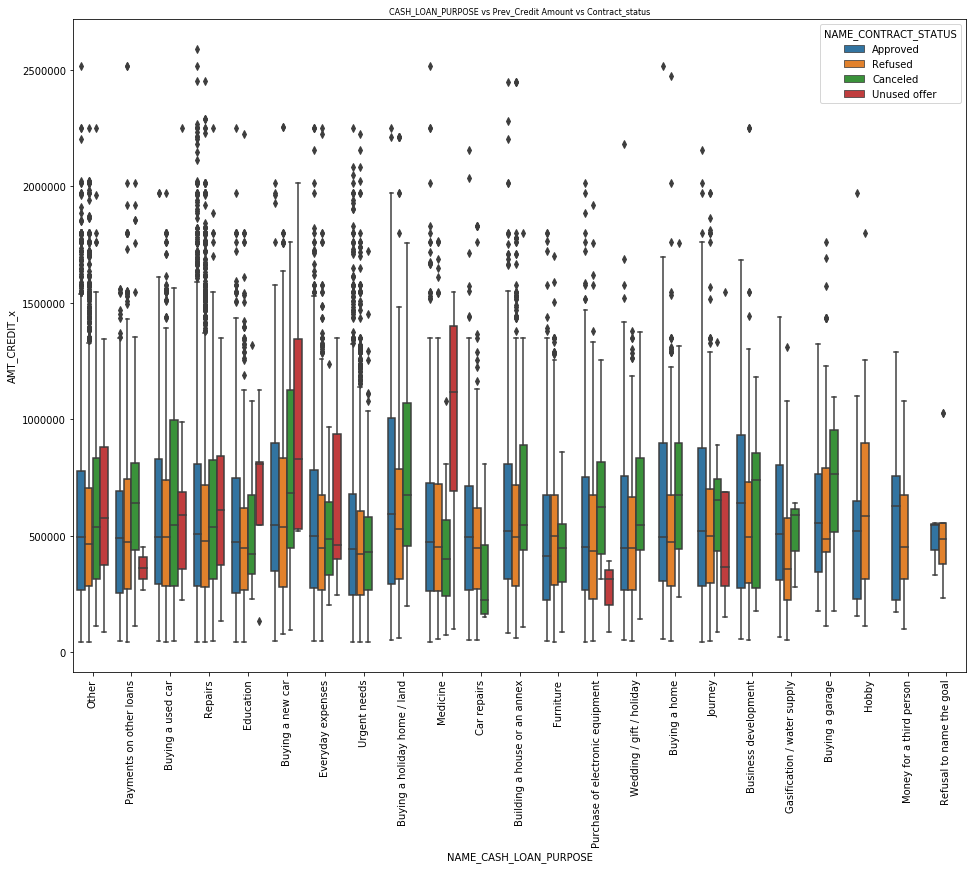

In [83]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('linear')
sns.boxplot(data =New_Comb, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_CONTRACT_STATUS',y='AMT_CREDIT_x')
plt.title('CASH_LOAN_PURPOSE vs Prev_Credit Amount vs Contract_status')
plt.show()

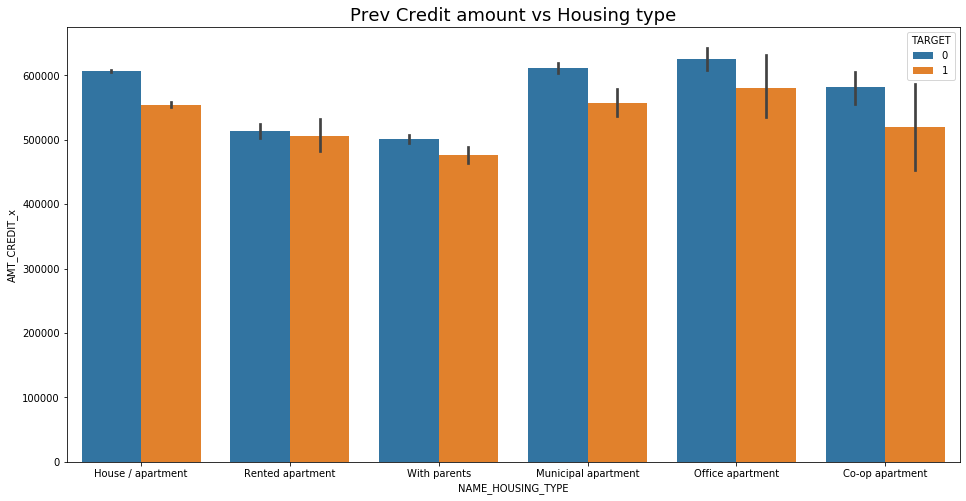

In [84]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16,8))
#plt.xticks(rotation=90)
sns.barplot(data =New_Comb, y='AMT_CREDIT_x',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type', fontsize=18)
plt.show()

Housing type, office appartment is having higher credit of target 0 and co-op apartment is having higher credit of target 1.
So, we can conclude that bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment.
Bank can focus mostly on housing type with parents or House\appartment or miuncipal appartment for successful payments.

***Conclusion***
1. Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ for successful payments.
2. Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.
3. Also with loan purpose ‘Repair’ is having higher number of unsuccessful payments on time.
4. NAME_EDUCATION_TYPE: Academic degree has less defaults.
5. ORGANIZATION_TYPE: Clients with Trade Type 4 and 5 and Industry type 8 have defaulted less than 3%.
6. AMT_INCOME_TOTAL:Applicant with Income more than 700,000 are less likely to default.
7. NAME_CASH_LOAN_PURPOSE: Loans bought for Hobby, Buying garage are being repayed mostly.
8. ORGANIZATION_TYPE: Organizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%). Self-employed people have relative high defaulting rate, and thus should be avoided to be approved for loan or provide loan with higher interest rate to mitigate the risk of defaulting.
9. AMT_INCOME: Since 90% of the applications have Income total less than 300,000 and they have high probability of defaulting, they could be offered loan with higher interest compared to other income category.
10. NAME_HOUSING_TYPE: High number of loan applications are from the category of people who live in Rented apartments & living with parents and hence offering the loan would mitigate the loss if any of those default.